# **Análisis exploratorio docentes por función**

Vamos a analizar un data set
en el cual están ordenados/as los/as docentes
por su función.
<br/>
El dataset a utilizar fue obtenido de [Datos Argentina](https://https://datos.gob.ar/) y corresponde al año 2014.

In [2]:
# Importamos las librerías a utilizar
import pandas as pd
from seaborn import barplot
from seaborn import set
import matplotlib.pyplot as plt

In [3]:
# Abrimos el data set, guardado en un xlsx
df_funcion = pd.read_excel('docentes_por_funcion.xlsx', sheet_name='Docentes por función')

In [4]:
# Creamos una copia para no pisar el df original
# Nos quedamos solo con las filas con información relevante
copia_df_funcion = df_funcion.iloc[10:90, :] 

In [5]:
# Los labels no están como queremos, así que los cambiamos
# Primero obtenemos los labels nuevos
new_labels = [df_funcion.loc[9][0], df_funcion.loc[9][1], df_funcion.loc[9][2]]

In [6]:
# Seleccionamos los labels viejos
old_labels = copia_df_funcion.columns.values

In [7]:
# Realizamos el cambio
copia_df_funcion.rename(columns={old_labels[0]:new_labels[0],
                                    old_labels[1]:new_labels[1],
                                    old_labels[2]:new_labels[2]},
                        inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
# Chequeamos que el cambio efectivamente se haya hecho
copia_df_funcion

,Provincia,Función,Docentes
10,NaN,Escuelas,NaN
11,Total país,Apoyo docente,166508
12,Total país,Direccion/Gestion,94223
13,Total país,Frente a alumnos,702020
14,Buenos Aires,Apoyo docente,60817
...,...,...,...
81,Tierra del Fuego,Direccion/Gestion,773
82,Tierra del Fuego,Frente a alumnos,3820
83,Tucumán,Apoyo docente,4705
84,Tucumán,Direccion/Gestion,2543


In [9]:
# Observamos que la fila que aparece primera no tiene info, la sacamos
copia_df_funcion = copia_df_funcion.iloc[1:90, :]

In [10]:
# Reenumeramos los índices
copia_df_funcion.index = range(75)

In [11]:
# Sacamos los datos del total del país para poder comparar entre provincias
df_sin_total = copia_df_funcion[copia_df_funcion.Provincia != 'Total país' ]

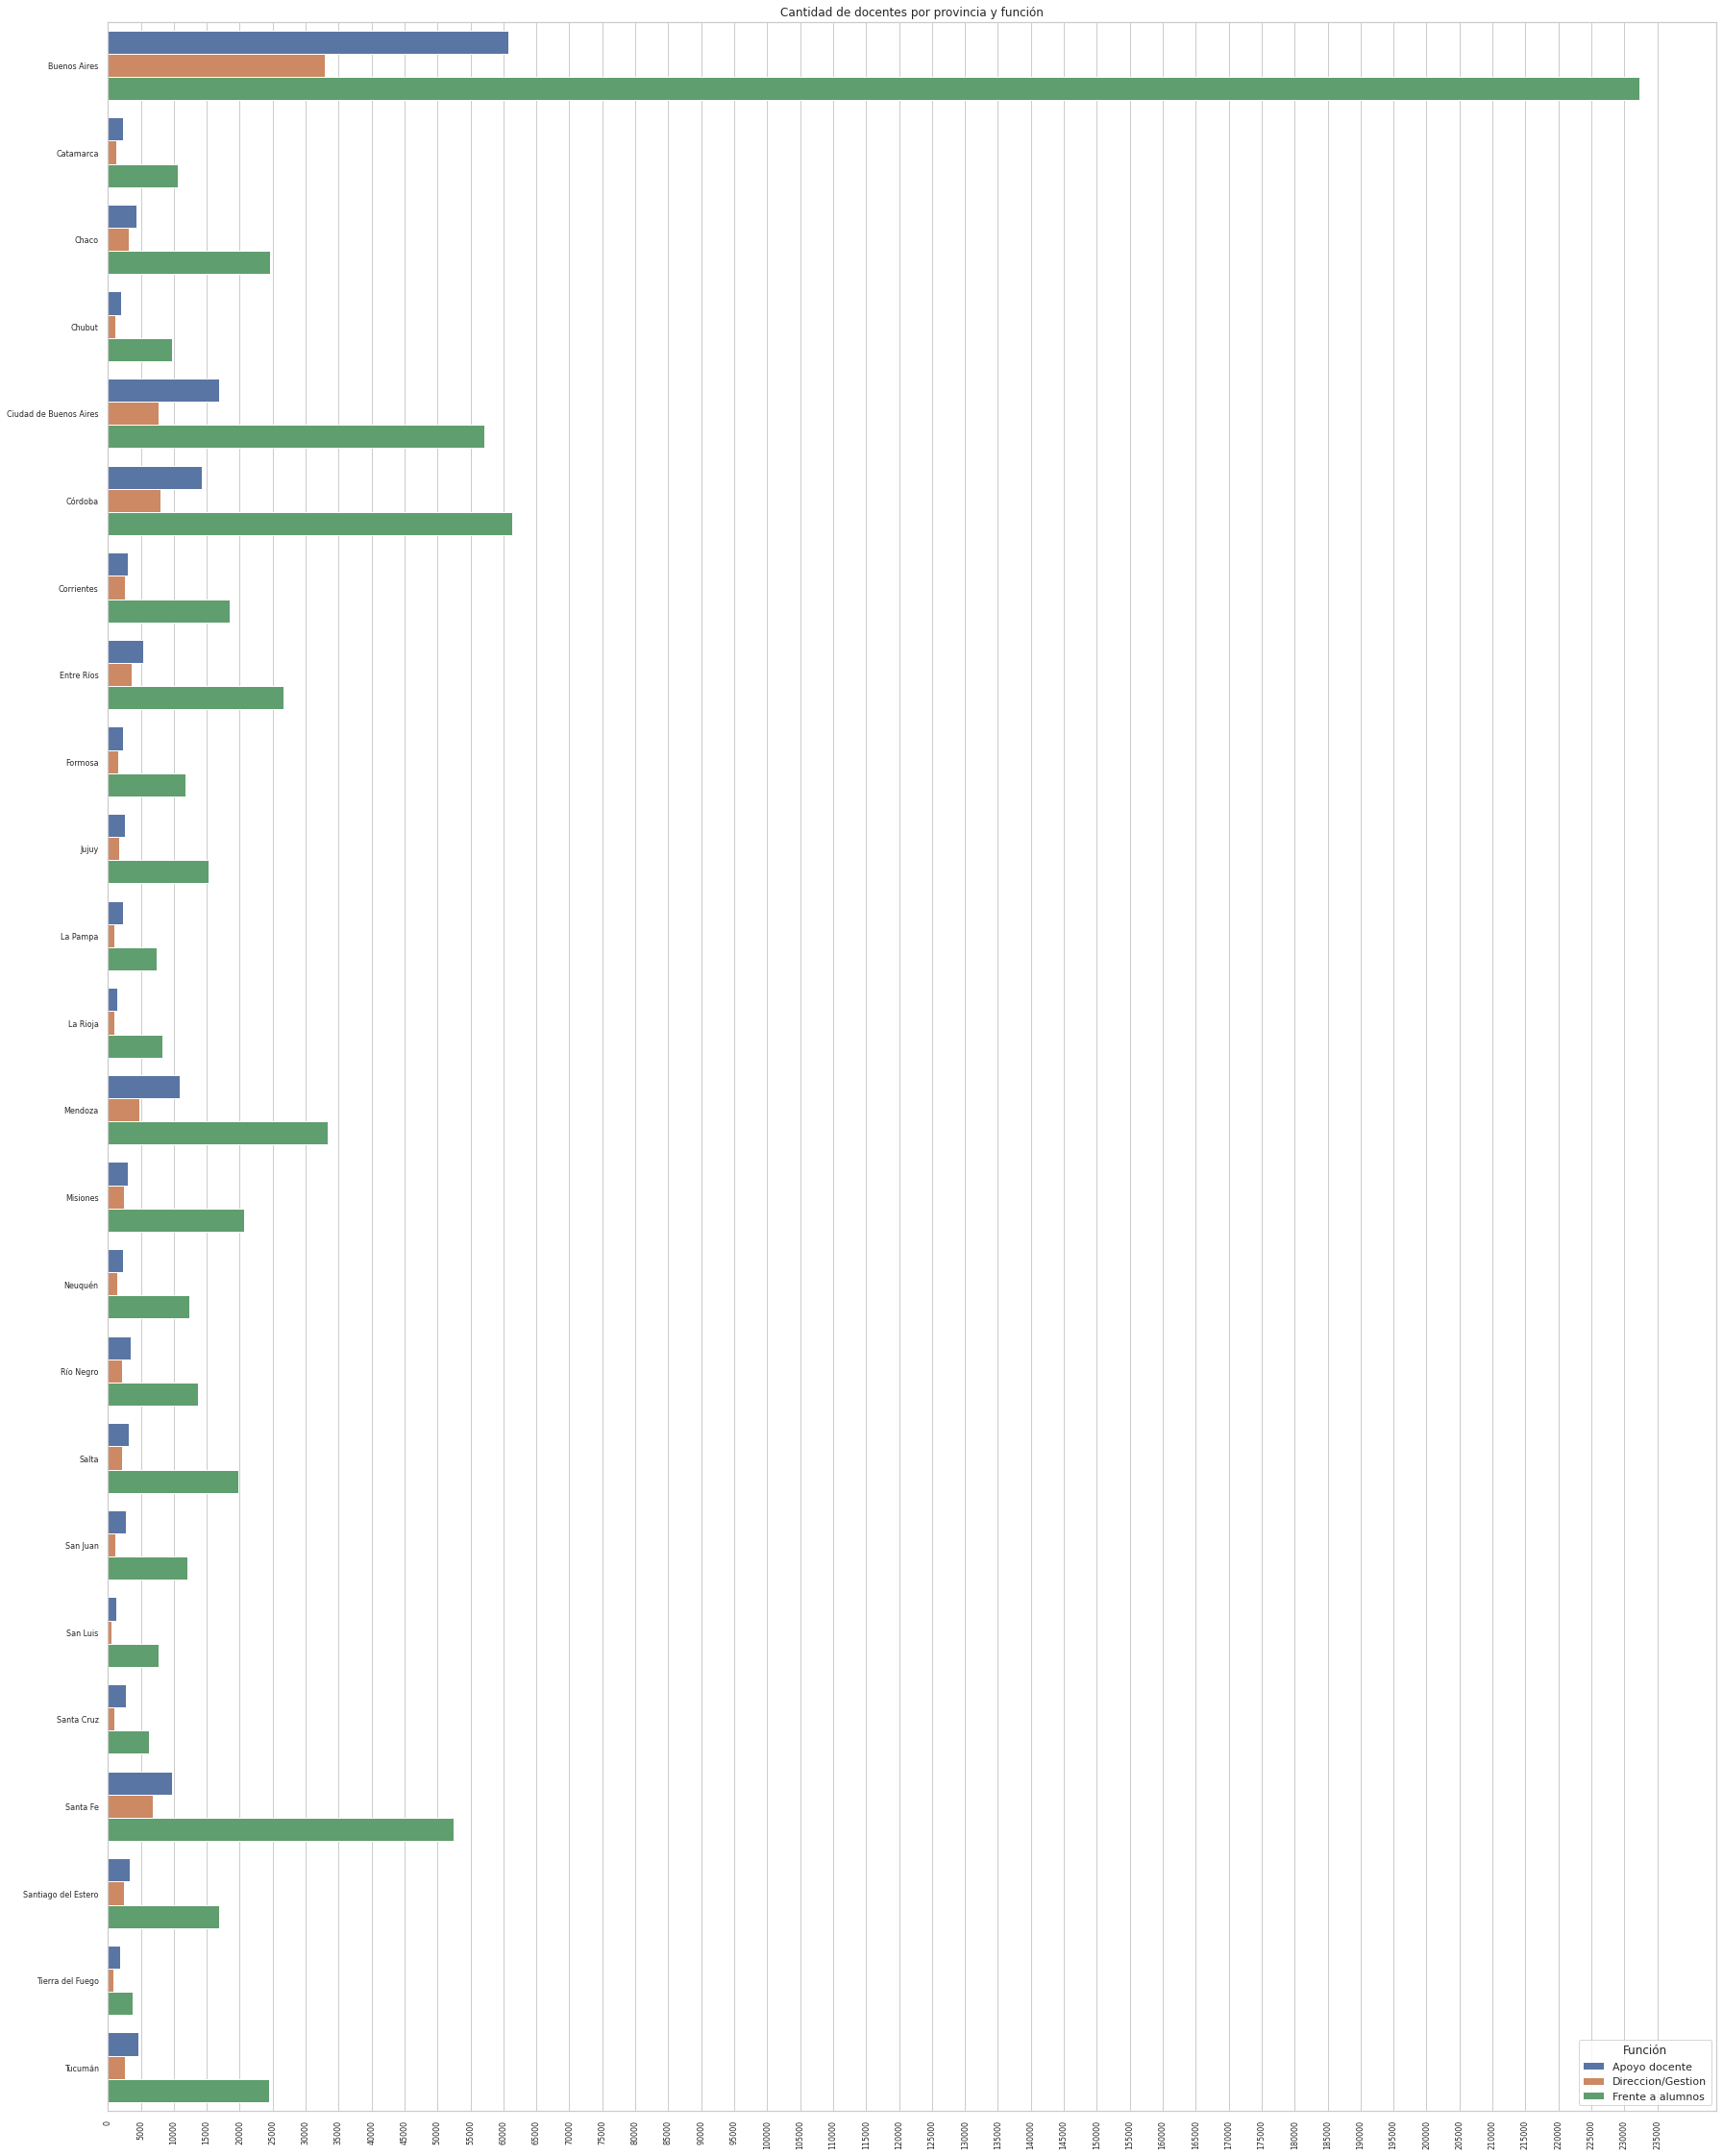

In [12]:
# Hacemos un barchart horizontal para poder comparar provincia a provincia
set(style="whitegrid", rc={'figure.figsize':(30, 40)})
fig = barplot(x='Docentes', y='Provincia', hue='Función', data=df_sin_total)
plt.title('Cantidad de docentes por provincia y función')
plt.ylabel('')
plt.xlabel('')
plt.yticks(size=8)
fig.set_xticks(range(0,240000, 5000))
plt.xticks(rotation=90)
plt.xticks(size=8)
plt.show()



*   En todas las provincias la cantidad de docentes frente a alumnos es mayor a las otras dos categorías.
*   En Buenos Aires esta diferencia parece ser muy superior.



Para poder apreciar mejor las diferencias, vamos a transformar los datos en porcentajes.

In [24]:
# Obtenemos la cantidad total de docentes por provincia
copia_sin_total = df_sin_total.copy()
agrupados = copia_sin_total.groupby('Provincia', as_index = False).sum()

In [25]:
print(agrupados)

                 Provincia  ... Docentes
0             Buenos Aires  ...   326095
1                Catamarca  ...    14205
2                    Chaco  ...    32102
3                   Chubut  ...    12846
4   Ciudad de Buenos Aires  ...    81701
5               Corrientes  ...    24049
6                  Córdoba  ...    83516
7               Entre Ríos  ...    35599
8                  Formosa  ...    15593
9                    Jujuy  ...    19741
10                La Pampa  ...    10717
11                La Rioja  ...    10765
12                 Mendoza  ...    49075
13                Misiones  ...    26244
14                 Neuquén  ...    16116
15               Río Negro  ...    19225
16                   Salta  ...    25190
17                San Juan  ...    15908
18                San Luis  ...     9624
19              Santa Cruz  ...    10032
20                Santa Fe  ...    69130
21     Santiago del Estero  ...    22658
22        Tierra del Fuego  ...     6400
23              

In [27]:
aux_df = agrupados[['Provincia', 'Docentes']]

In [40]:
aux_df = aux_df.rename(columns={'Docentes': 'Total_docentes_pcia'})

In [41]:
#Agregamos la cantidad total de docentes por provincia al df
combined_df=copia_sin_total.merge(aux_df, on='Provincia', how='left') 

In [42]:
combined_df

,Provincia,Función,Docentes_x,Docentes_y,Total_docentes_pcia
0,Buenos Aires,Apoyo docente,60817,326095,326095
1,Buenos Aires,Direccion/Gestion,32917,326095,326095
2,Buenos Aires,Frente a alumnos,232361,326095,326095
3,Catamarca,Apoyo docente,2297,14205,14205
4,Catamarca,Direccion/Gestion,1344,14205,14205
...,...,...,...,...,...
67,Tierra del Fuego,Direccion/Gestion,773,6400,6400
68,Tierra del Fuego,Frente a alumnos,3820,6400,6400
69,Tucumán,Apoyo docente,4705,31747,31747
70,Tucumán,Direccion/Gestion,2543,31747,31747


In [44]:
final_df = combined_df.drop('Docentes_y', axis=1)

In [45]:
final_df

,Provincia,Función,Docentes_x,Total_docentes_pcia
0,Buenos Aires,Apoyo docente,60817,326095
1,Buenos Aires,Direccion/Gestion,32917,326095
2,Buenos Aires,Frente a alumnos,232361,326095
3,Catamarca,Apoyo docente,2297,14205
4,Catamarca,Direccion/Gestion,1344,14205
...,...,...,...,...
67,Tierra del Fuego,Direccion/Gestion,773,6400
68,Tierra del Fuego,Frente a alumnos,3820,6400
69,Tucumán,Apoyo docente,4705,31747
70,Tucumán,Direccion/Gestion,2543,31747


In [46]:
final_df = final_df.rename(columns={'Docentes_x': 'Docentes_funcion'})

In [47]:
final_df

,Provincia,Función,Docentes_funcion,Total_docentes_pcia
0,Buenos Aires,Apoyo docente,60817,326095
1,Buenos Aires,Direccion/Gestion,32917,326095
2,Buenos Aires,Frente a alumnos,232361,326095
3,Catamarca,Apoyo docente,2297,14205
4,Catamarca,Direccion/Gestion,1344,14205
...,...,...,...,...
67,Tierra del Fuego,Direccion/Gestion,773,6400
68,Tierra del Fuego,Frente a alumnos,3820,6400
69,Tucumán,Apoyo docente,4705,31747
70,Tucumán,Direccion/Gestion,2543,31747


In [53]:
#Cambiamos los tipos de las columnas a int
final_df = final_df.astype({"Docentes_funcion": int, "Total_docentes_pcia": int})

In [54]:
#Calculamos los porcentajes por provincia
final_df.eval('Porcentajes_por_pcia = (Docentes_funcion/Total_docentes_pcia)*100', inplace=True)

In [55]:
final_df

,Provincia,Función,Docentes_funcion,Total_docentes_pcia,Porcentajes_por_pcia
0,Buenos Aires,Apoyo docente,60817,326095,18.650087
1,Buenos Aires,Direccion/Gestion,32917,326095,10.094298
2,Buenos Aires,Frente a alumnos,232361,326095,71.255616
3,Catamarca,Apoyo docente,2297,14205,16.170363
4,Catamarca,Direccion/Gestion,1344,14205,9.461457
...,...,...,...,...,...
67,Tierra del Fuego,Direccion/Gestion,773,6400,12.078125
68,Tierra del Fuego,Frente a alumnos,3820,6400,59.687500
69,Tucumán,Apoyo docente,4705,31747,14.820298
70,Tucumán,Direccion/Gestion,2543,31747,8.010206


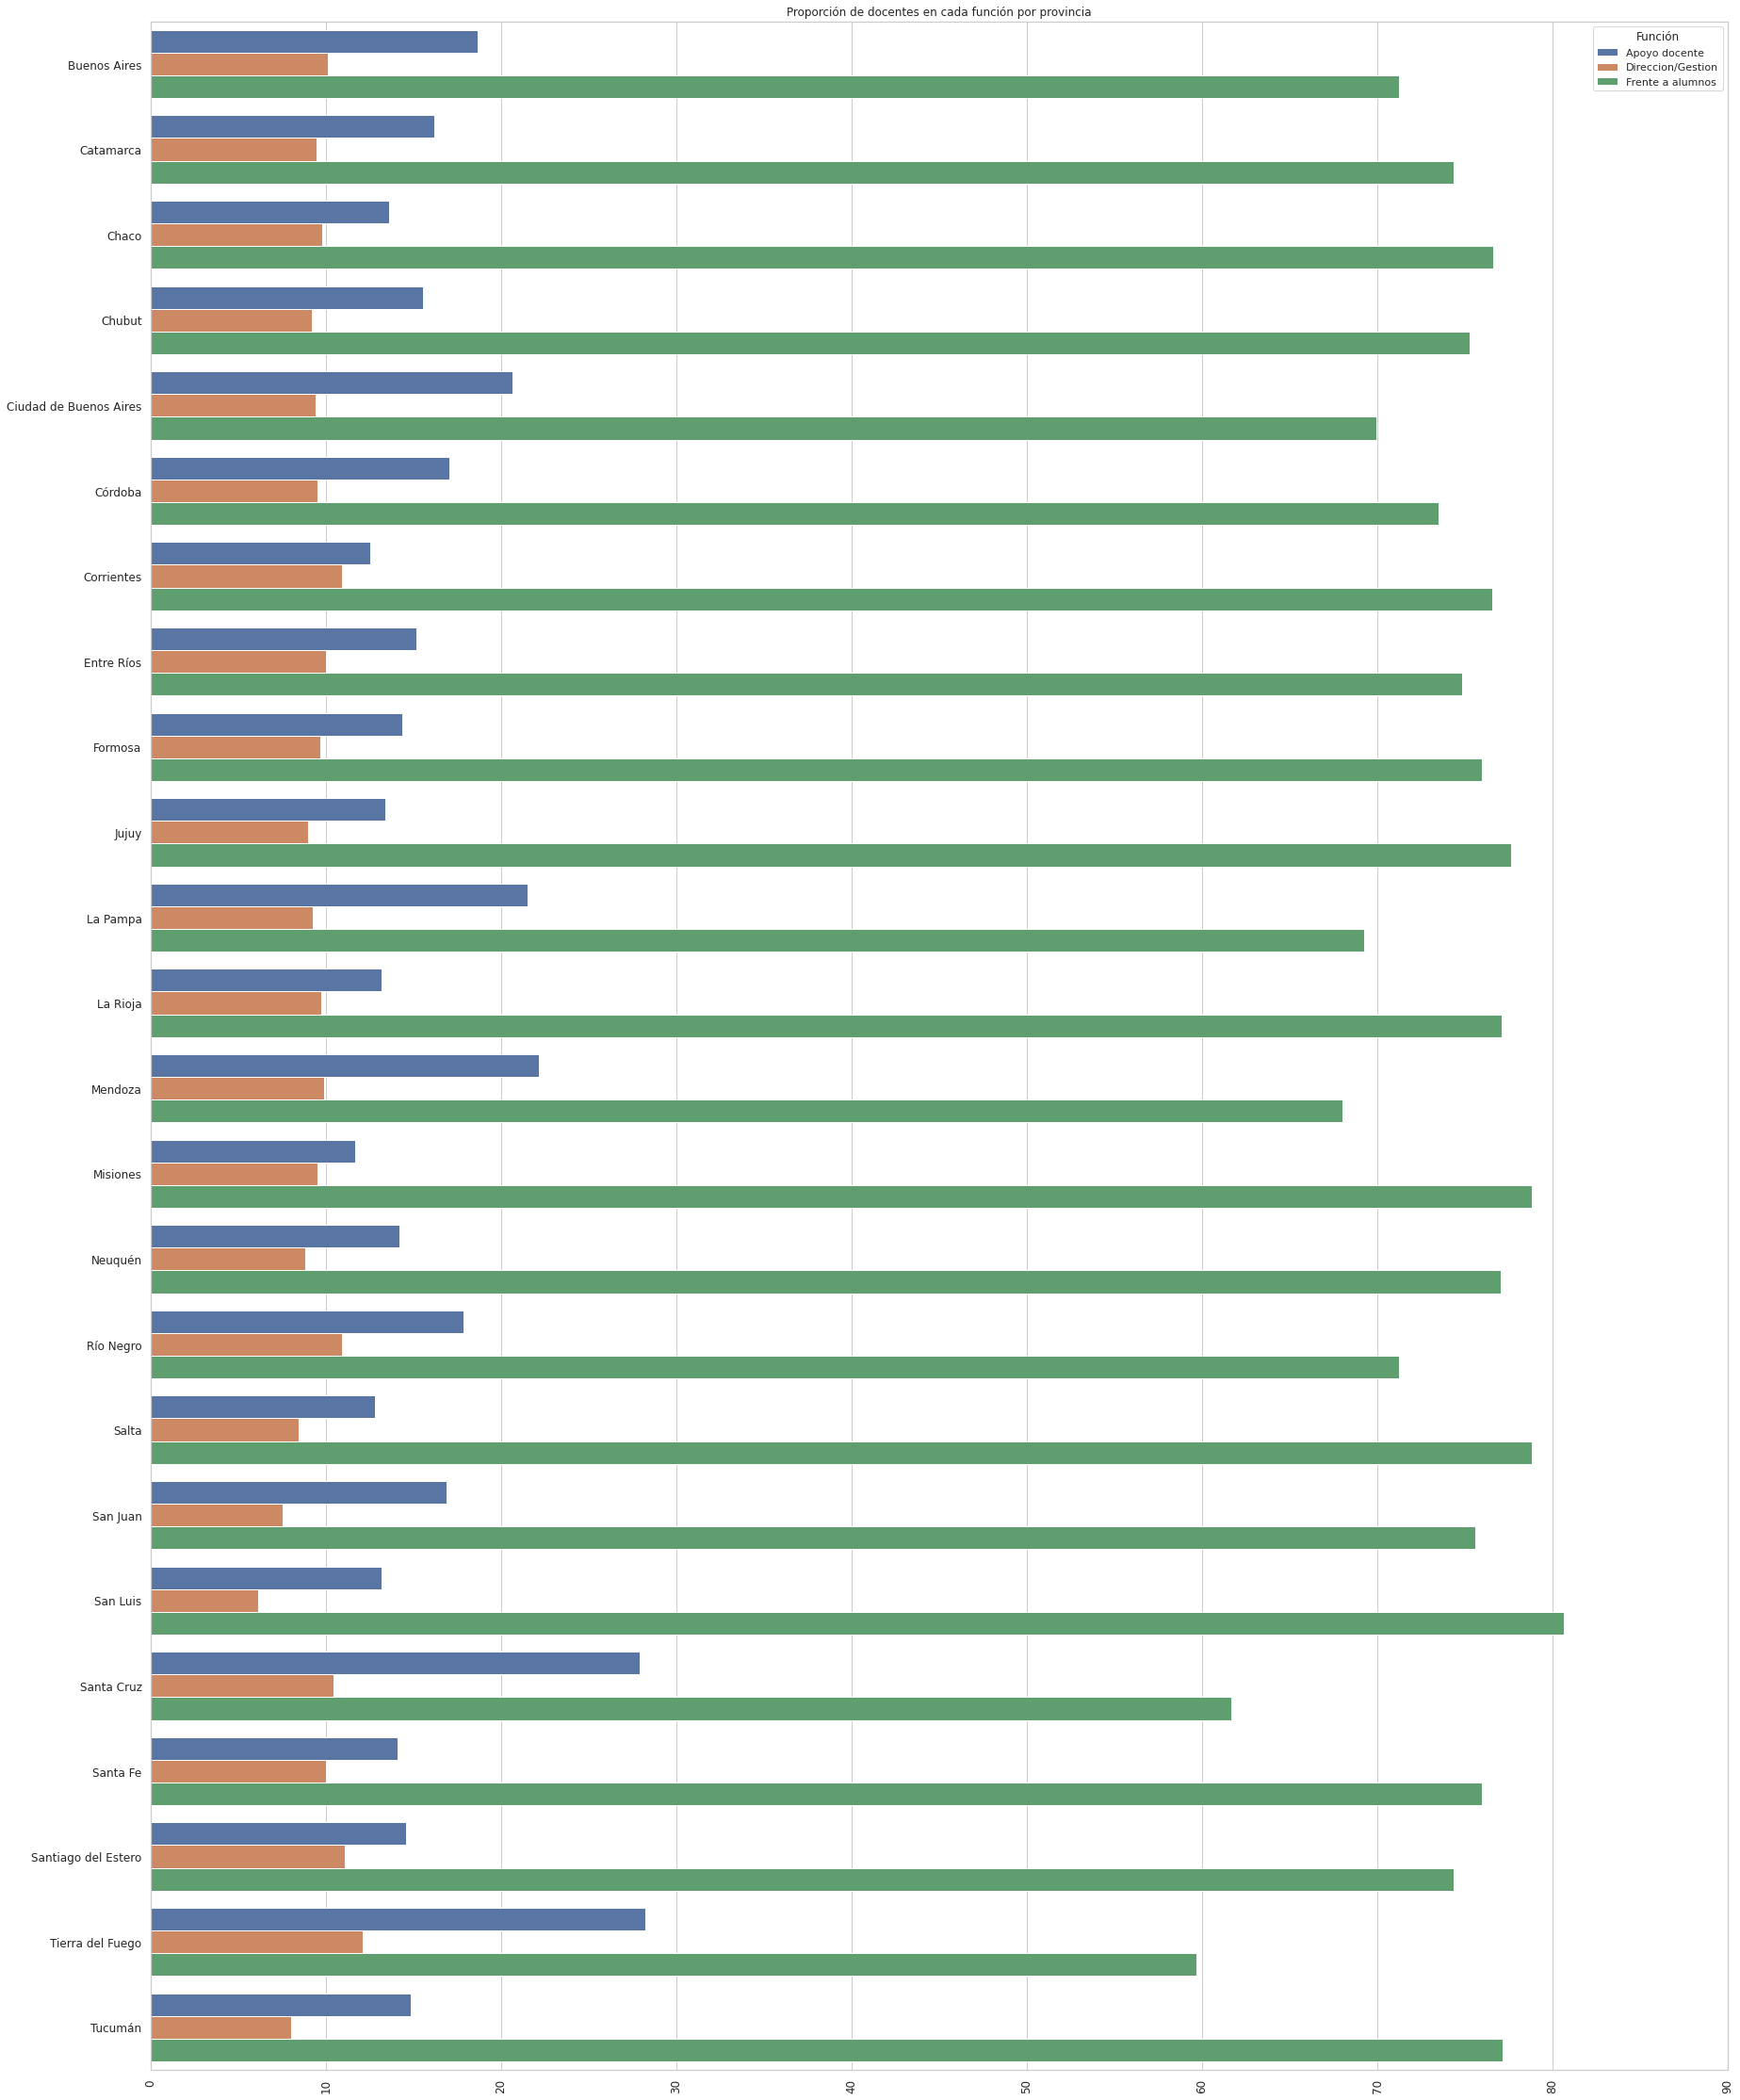

In [58]:
# Hacemos un barchart horizontal para poder comparar provincia a provincia
set(style="whitegrid", rc={'figure.figsize':(30, 40)})
fig = barplot(x='Porcentajes_por_pcia', y='Provincia', hue='Función', data=final_df)
plt.title('Proporción de docentes en cada función por provincia')
plt.ylabel('')
plt.xlabel('')
plt.yticks(size=12)
fig.set_xticks(range(0,100, 10))
plt.xticks(rotation=90)
plt.xticks(size=12)
plt.show()



*   En todas las provincias más del 50% de docentes ocupan puestos frente a alumnos.
*   La provincia con mayor porcentaje de puestos frente a alumnos es San Luis.

*   Las provincias con mayores porcentajes en puestos de apoyo docente son Tierra del Fuego y Santa Cruz.
*   San Luis es la provincia con el menor porcentaje en dirección/gestión.



